## Multivariate Linear Regression on Melbourne Housing Data

#### Predict the price for the houses using the melbourne housing dataset. This will be done using multivariate linear regression

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
df = pd.read_csv("housing_price_linear_regression/melb_data.csv")

In [6]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [7]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [8]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [9]:
X = df[['Rooms', 'Bathroom', 'BuildingArea']]

[(0, 500)]

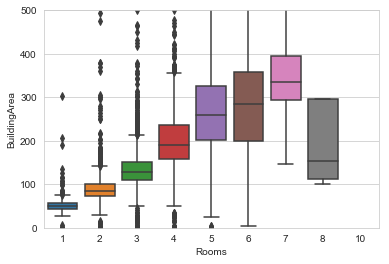

In [24]:
X[['Rooms', 'BuildingArea']]
sns.set_style("whitegrid")
ax = sns.boxplot(X['Rooms'], X['BuildingArea'])
ax.set(ylim=(0, 500))

In [59]:
rdict = {}
for each in range(1, 11):
    rdict[each] = df.loc[df['Rooms'] == each].describe()['BuildingArea']['mean']
print(rdict)

{1: 52.61850574712644, 2: 92.87214247455813, 3: 139.14718361981798, 4: 208.9650728442729, 5: 405.6073468390805, 6: 278.5138888888889, 7: 340.42333333333335, 8: 256.0, 9: nan, 10: nan}


In [63]:
print(rdict)
def fill_missing_building_area(cols):
    rdict = {1: 52.61850574712644, 
              2: 92.87214247455813, 
              3: 139.14718361981798, 
              4: 208.9650728442729, 
              5: 405.6073468390805, 
              6: 278.5138888888889, 
              7: 340.42333333333335, 
              8: 256.0}
    num_of_rooms = cols[0]
    barea = cols[1]
    if pd.isnull(barea):
        if num_of_rooms < 9:
            return rdict[num_of_rooms]
        else:
            return 0.0
    else:
        return barea


{1: 52.61850574712644, 2: 92.87214247455813, 3: 139.14718361981798, 4: 208.9650728442729, 5: 405.6073468390805, 6: 278.5138888888889, 7: 340.42333333333335, 8: 256.0, 9: nan, 10: nan}


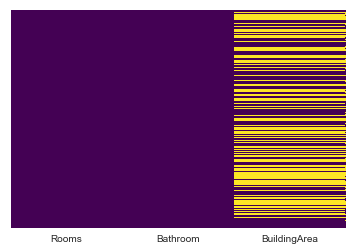

In [64]:
sns.heatmap(data=X.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [67]:
# Cleanup of BuildingArea - Assigning average values based on the number of rooms.

In [65]:
X['BuildingArea'] = X[['Rooms', 'BuildingArea']].apply(fill_missing_building_area,axis=1)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


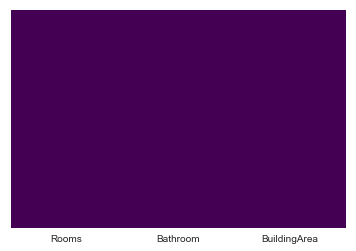

In [66]:
sns.heatmap(data=X.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [68]:
from sklearn.model_selection import train_test_split

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, df['Price'], test_size=0.30,
                                                    random_state=101)


In [71]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [72]:
predictions = lin_reg.predict(X_test)

In [73]:
predictions

array([1183307.55781958,  720349.80252868, 1200009.77845117, ...,
       1196739.48572432,  957492.93128038,  733529.50042118])

In [79]:
from sklearn .metrics import mean_squared_error
MSE = mean_squared_error(y_test, predictions)

In [80]:
MSE

433998040000.4865

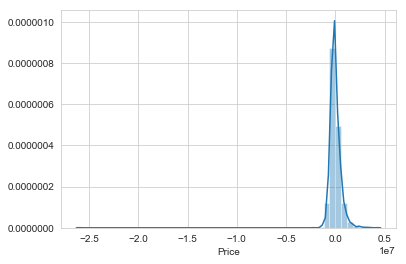

In [81]:
sns.distplot(y_test-predictions, bins=50)

In [83]:
from sklearn import metrics
print("MAE:", metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 378784.704141184
MSE: 433998040000.4865
RMSE: 658785.2760956992
